In [7]:
import pandas as pd

In [41]:
df = pd.read_html('https://fbref.com/en/comps/9/2021-2022/2021-2022-Premier-League-Stats')

In [91]:
for idx,table in enumerate(df):
    print("********************")
    print(idx)
    print(table)

********************
0
    Rk            Squad  MP   W   D   L  GF  GA  GD  Pts  Pts/MP    xG   xGA  \
0    1  Manchester City  38  29   6   3  99  26  73   93    2.45  96.6  26.0   
1    2        Liverpool  38  28   8   2  94  26  68   92    2.42  95.1  37.3   
2    3          Chelsea  38  21  11   6  76  33  43   74    1.95  70.7  38.3   
3    4        Tottenham  38  22   5  11  69  40  29   71    1.87  66.5  45.3   
4    5          Arsenal  38  22   3  13  61  48  13   69    1.82  67.3  51.2   
5    6   Manchester Utd  38  16  10  12  57  57   0   58    1.53  61.7  59.6   
6    7         West Ham  38  16   8  14  60  51   9   56    1.47  58.0  58.1   
7    8   Leicester City  38  14  10  14  62  59   3   52    1.37  52.1  68.8   
8    9         Brighton  38  12  15  11  42  44  -2   51    1.34  53.0  49.8   
9   10           Wolves  38  15   6  17  38  43  -5   51    1.34  41.2  63.7   
10  11    Newcastle Utd  38  13  10  15  44  62 -18   49    1.29  44.4  62.4   
11  12   Crystal 

In [87]:
#constants
prem = 'https://fbref.com/en/comps/9/'
prem1 = '-Premier-League-Stats'
laliga = 'https://fbref.com/en/comps/12/'
laliga1 = '-La-Liga-Stats'
seriea = 'https://fbref.com/en/comps/11/'
seriea1 = '-Serie-A-Stats'
bundesliga = 'https://fbref.com/en/comps/20/'
bundesliga1 = '-Bundesliga-Stats'
ligue1 = 'https://fbref.com/en/comps/13/'
ligue11 = '-Ligue-1-Stats'

In [58]:
def get_df(num, cols, check,year,league,league1):
    df = pd.read_html(league+year+'/'+year+league1)
    temp = pd.DataFrame(df[num])
    temp.columns = temp.columns.droplevel()
    temp = temp[cols]
    if(check):
        temp['Squad'] = temp['Squad'].str.split("vs", n = 1, expand = False).str[1]
    return temp

In [72]:
def combine_df(year,league,league1):
    three = get_df(3,["Squad","90s","npxG"], True,year,league,league1) 
    three['Squad'] = three['Squad'].str.strip()
    four = get_df(4,["Squad","Saves"], False,year,league,league1)
    six = get_df(6,["Squad","OG","GA","AvgDist"],False,year,league,league1)
    six = six.rename(columns={'AvgDist':'AvgDistDefAct'})
    nine = get_df(9,["Squad","Sh","Dist"],True,year,league,league1)
    nine['Squad'] = nine['Squad'].str.strip()
    nine = nine.rename(columns={'Sh':'ShotsAllowed','Dist':'AvgDistShot'})
    sixteen = get_df(16,["Squad","Sh"],False,year,league,league1)
    eighteen = get_df(18,["Squad","Poss"],False,year,league,league1)
    nineteen = get_df(19,["Squad","Att 3rd"],True,year,league,league1)
    nineteen['Squad'] = nineteen['Squad'].str.strip()
    nineteen = nineteen.rename(columns={'Att 3rd':'Att3rdTouches'})
    t1 = three.merge(four,on='Squad')
    t2 = t1.merge(six,on='Squad')
    t3 = t2.merge(nine,on='Squad')
    t4 = t3.merge(sixteen,on='Squad')
    t5 = t4.merge(eighteen,on='Squad')
    t6 = t5.merge(nineteen,on='Squad')
    t6['Year'] = year
    return t6

In [77]:
prem2122 = combine_df('2021-2022',prem,prem1)
prem2021 = combine_df('2020-2021',prem,prem1)
prem1819 = combine_df('2018-2019',prem,prem1)
prem1718 = combine_df('2017-2018',prem,prem1)

In [79]:
laliga2122 = combine_df('2021-2022',laliga,laliga1)
laliga2021 = combine_df('2020-2021',laliga,laliga1)
laliga1819 = combine_df('2018-2019',laliga,laliga1)
laliga1718 = combine_df('2017-2018',laliga,laliga1)

In [80]:
bundes2122 = combine_df('2021-2022',bundesliga,bundesliga1)
bundes2021 = combine_df('2020-2021',bundesliga,bundesliga1)
bundes1819 = combine_df('2018-2019',bundesliga,bundesliga1)
bundes1718 = combine_df('2017-2018',bundesliga,bundesliga1)

In [81]:
seriea2122 = combine_df('2021-2022',seriea,seriea1)
seriea2021 = combine_df('2020-2021',seriea,seriea1)
seriea1819 = combine_df('2018-2019',seriea,seriea1)
seriea1718 = combine_df('2017-2018',seriea,seriea1)

In [82]:
ligue12122 = combine_df('2021-2022',ligue1,ligue11)
ligue12021 = combine_df('2020-2021',ligue1,ligue11)
ligue11819 = combine_df('2018-2019',ligue1,ligue11)
ligue11718 = combine_df('2017-2018',ligue1,ligue11)

In [78]:
prem_final = prem1718.append(prem1819.append(prem2021.append(prem2122, ignore_index=True), 
             ignore_index=True), ignore_index = True)
prem_final

C:\Users\jrajenav\AppData\Local\Temp\ipykernel_5464\3015358383.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prem_final = prem1718.append(prem1819.append(prem2021.append(prem2122, ignore_index=True),


,Squad,90s,npxG,npxG,Saves,OG,GA,AvgDistDefAct,ShotsAllowed,AvgDistShot,Sh,Poss,Att3rdTouches,Year
0,Arsenal,38.0,43.1,1.13,94,0,51,14.3,418,17.3,103,61.4,4764,2017-2018
1,Bournemouth,38.0,56.8,1.50,109,1,61,10.2,544,17.4,160,48.1,6139,2017-2018
2,Brighton,38.0,48.4,1.27,121,5,54,10.2,552,18.6,190,43.7,6807,2017-2018
3,Burnley,38.0,47.7,1.26,121,1,39,12.5,565,18.6,191,43.7,6199,2017-2018
4,Chelsea,38.0,32.2,0.85,81,2,38,13.8,375,18.3,107,55.6,5158,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Southampton,38.0,61.9,1.63,118,2,67,11.6,493,16.2,132,47.7,5819,2021-2022
76,Tottenham,38.0,43.7,1.15,98,1,40,14.2,490,17.6,161,51.8,6017,2021-2022
77,Watford,38.0,67.2,1.77,113,3,77,15.9,554,16.9,148,40.7,6517,2021-2022
78,West Ham,38.0,53.9,1.42,113,2,51,10.2,542,17.5,175,47.9,6093,2021-2022


In [83]:
laliga_final = laliga1718.append(laliga1819.append(laliga2021.append(laliga2122, ignore_index=True), 
             ignore_index=True), ignore_index = True)
laliga_final

C:\Users\jrajenav\AppData\Local\Temp\ipykernel_5464\3826946237.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  laliga_final = laliga1718.append(laliga1819.append(laliga2021.append(laliga2122, ignore_index=True),


,Squad,90s,npxG,npxG,Saves,OG,GA,AvgDistDefAct,ShotsAllowed,AvgDistShot,Sh,Poss,Att3rdTouches,Year
0,Alavés,38.0,48.6,1.28,122,2,50,12.4,523,18.7,133,40.3,6201,2017-2018
1,Athletic Club,38.0,45.6,1.20,117,3,49,13.6,463,19.3,103,49.6,4837,2017-2018
2,Atlético Madrid,38.0,32.6,0.86,105,1,22,12.0,440,20.0,129,47.5,5889,2017-2018
3,Barcelona,38.0,40.5,1.06,104,0,29,15.0,442,19.3,103,62.8,4251,2017-2018
4,Betis,38.0,45.8,1.20,98,4,61,14.0,451,17.9,95,56.9,5063,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Real Madrid,38.0,44.2,1.16,97,0,31,15.1,428,18.7,114,59.9,4972,2021-2022
76,Real Sociedad,38.0,39.4,1.04,89,0,37,16.1,413,18.7,105,54.3,5134,2021-2022
77,Sevilla,38.0,40.2,1.06,90,0,30,14.0,420,18.7,124,59.4,4639,2021-2022
78,Valencia,38.0,44.1,1.16,112,3,53,15.6,437,18.1,93,43.6,5262,2021-2022


In [84]:
seriea_final = seriea1718.append(seriea1819.append(seriea2021.append(seriea2122, ignore_index=True), 
             ignore_index=True), ignore_index = True)
seriea_final

C:\Users\jrajenav\AppData\Local\Temp\ipykernel_5464\2754908868.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seriea_final = seriea1718.append(seriea1819.append(seriea2021.append(seriea2122, ignore_index=True),


,Squad,90s,npxG,npxG,Saves,OG,GA,AvgDistDefAct,ShotsAllowed,AvgDistShot,Sh,Poss,Att3rdTouches,Year
0,Atalanta,38.0,35.1,0.92,78,0,39,14.4,405,18.7,107,55.4,4486,2017-2018
1,Benevento,38.0,63.0,1.66,127,2,84,14.4,553,18.4,140,47.5,6297,2017-2018
2,Bologna,38.0,48.2,1.27,117,3,52,14.3,532,17.6,127,46.8,5856,2017-2018
3,Cagliari,38.0,49.9,1.31,110,1,61,10.3,526,18.2,126,45.3,6013,2017-2018
4,Chievo,38.0,49.9,1.31,129,4,59,10.3,582,19.1,158,44.4,6244,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Sassuolo,38.0,65.3,1.72,111,1,66,13.2,523,15.9,127,54.9,5251,2021-2022
76,Spezia,38.0,62.3,1.64,139,3,71,12.5,630,18.1,176,42.7,6277,2021-2022
77,Torino,38.0,35.1,0.92,81,0,41,14.4,384,18.7,108,53.3,4124,2021-2022
78,Udinese,38.0,52.3,1.38,105,1,58,11.3,462,17.4,122,42.7,5021,2021-2022


In [85]:
bundes_final = bundes1718.append(bundes1819.append(bundes2021.append(bundes2122, ignore_index=True), 
             ignore_index=True), ignore_index = True)
bundes_final

C:\Users\jrajenav\AppData\Local\Temp\ipykernel_5464\3695387395.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bundes_final = bundes1718.append(bundes1819.append(bundes2021.append(bundes2122, ignore_index=True),


,Squad,90s,npxG,npxG,Saves,OG,GA,AvgDistDefAct,ShotsAllowed,AvgDistShot,Sh,Poss,Att3rdTouches,Year
0,Augsburg,34.0,39.1,1.15,119,0,46,12.0,465,18.8,107,45.7,4722,2017-2018
1,Bayern Munich,34.0,28.4,0.84,67,3,28,15.5,284,19.0,75,66.1,2798,2017-2018
2,Dortmund,34.0,40.1,1.18,105,0,47,14.0,365,18.0,73,59.1,3863,2017-2018
3,Eint Frankfurt,34.0,39.4,1.16,90,2,45,15.2,394,18.1,101,47.9,4093,2017-2018
4,Freiburg,34.0,42.2,1.24,106,4,56,14.2,484,18.4,117,44.8,4923,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Mainz 05,34.0,44.0,1.29,80,1,45,17.7,377,18.7,94,46.5,4349,2021-2022
68,RB Leipzig,34.0,41.5,1.22,79,1,37,20.8,349,16.9,81,56.1,3506,2021-2022
69,Stuttgart,34.0,58.6,1.72,105,1,59,15.5,499,17.6,124,50.7,4682,2021-2022
70,Union Berlin,34.0,41.3,1.21,82,4,44,12.4,393,17.6,90,43.7,4396,2021-2022


In [86]:
ligue1_final = ligue11718.append(ligue11819.append(ligue12021.append(ligue12122, ignore_index=True), 
             ignore_index=True), ignore_index = True)
ligue1_final

C:\Users\jrajenav\AppData\Local\Temp\ipykernel_5464\1300216444.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ligue1_final = ligue11718.append(ligue11819.append(ligue12021.append(ligue12122, ignore_index=True),


,Squad,90s,npxG,npxG,Saves,OG,GA,AvgDistDefAct,ShotsAllowed,AvgDistShot,Sh,Poss,Att3rdTouches,Year
0,Amiens,38.0,51.9,1.36,136,0,42,12.5,600,19.6,164,43.3,6217,2017-2018
1,Angers,38.0,40.3,1.06,90,4,52,14.3,410,19.2,79,45.1,4967,2017-2018
2,Bordeaux,38.0,37.7,0.99,81,1,48,14.4,411,20.3,110,50.6,4611,2017-2018
3,Caen,38.0,44.1,1.16,103,4,52,12.9,431,19.2,97,45.5,5300,2017-2018
4,Dijon,38.0,52.7,1.39,128,3,73,16.8,511,18.8,118,48.4,5274,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Reims,38.0,49.0,1.29,116,0,44,14.8,506,18.8,154,42.2,6242,2021-2022
76,Rennes,38.0,42.8,1.13,66,1,40,17.4,350,17.4,92,55.9,4431,2021-2022
77,Saint-Étienne,38.0,57.6,1.51,116,4,77,17.2,452,16.8,93,48.5,5018,2021-2022
78,Strasbourg,38.0,48.0,1.26,89,1,43,13.7,409,17.9,94,49.5,4748,2021-2022


In [113]:
df_final = prem_final.append(laliga_final.append(bundes_final.append(seriea_final.append(ligue1_final, ignore_index=True),
           ignore_index=True),ignore_index=True),ignore_index=True)
df_final

C:\Users\jrajenav\AppData\Local\Temp\ipykernel_5464\1629031021.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = prem_final.append(laliga_final.append(bundes_final.append(seriea_final.append(ligue1_final, ignore_index=True),


,Squad,90s,npxG,npxG,Saves,OG,GA,AvgDistDefAct,ShotsAllowed,AvgDistShot,Sh,Poss,Att3rdTouches,Year
0,Arsenal,38.0,43.1,1.13,94,0,51,14.3,418,17.3,103,61.4,4764,2017-2018
1,Bournemouth,38.0,56.8,1.50,109,1,61,10.2,544,17.4,160,48.1,6139,2017-2018
2,Brighton,38.0,48.4,1.27,121,5,54,10.2,552,18.6,190,43.7,6807,2017-2018
3,Burnley,38.0,47.7,1.26,121,1,39,12.5,565,18.6,191,43.7,6199,2017-2018
4,Chelsea,38.0,32.2,0.85,81,2,38,13.8,375,18.3,107,55.6,5158,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Reims,38.0,49.0,1.29,116,0,44,14.8,506,18.8,154,42.2,6242,2021-2022
388,Rennes,38.0,42.8,1.13,66,1,40,17.4,350,17.4,92,55.9,4431,2021-2022
389,Saint-Étienne,38.0,57.6,1.51,116,4,77,17.2,452,16.8,93,48.5,5018,2021-2022
390,Strasbourg,38.0,48.0,1.26,89,1,43,13.7,409,17.9,94,49.5,4748,2021-2022


In [114]:
teams = df_final[["Squad","Year"]]
teams

,Squad,Year
0,Arsenal,2017-2018
1,Bournemouth,2017-2018
2,Brighton,2017-2018
3,Burnley,2017-2018
4,Chelsea,2017-2018
...,...,...
387,Reims,2021-2022
388,Rennes,2021-2022
389,Saint-Étienne,2021-2022
390,Strasbourg,2021-2022


In [115]:
df_final["Saves"] = df_final["Saves"] / df_final["90s"]
df_final["OG"] = df_final["OG"] / df_final["90s"]
df_final["GA"] = df_final["GA"] / df_final["90s"]
df_final["ShotsAllowed"] = df_final["ShotsAllowed"] / df_final["90s"]
df_final["Sh"] = df_final["Sh"] / df_final["90s"]
df_final["Att3rdTouches"] = df_final["Att3rdTouches"] / df_final["90s"]

In [116]:
df_final = df_final.rename(columns={"Sh":"ShotsBlocked"})

In [117]:
df_final = df_final.drop(["Squad","90s","Year"],axis=1)

In [118]:
df_final = df_final.iloc[: , 1:]

In [119]:
df_final

,npxG,Saves,OG,GA,AvgDistDefAct,ShotsAllowed,AvgDistShot,ShotsBlocked,Poss,Att3rdTouches
0,1.13,2.473684,0.000000,1.342105,14.3,11.000000,17.3,2.710526,61.4,125.368421
1,1.50,2.868421,0.026316,1.605263,10.2,14.315789,17.4,4.210526,48.1,161.552632
2,1.27,3.184211,0.131579,1.421053,10.2,14.526316,18.6,5.000000,43.7,179.131579
3,1.26,3.184211,0.026316,1.026316,12.5,14.868421,18.6,5.026316,43.7,163.131579
4,0.85,2.131579,0.052632,1.000000,13.8,9.868421,18.3,2.815789,55.6,135.736842
...,...,...,...,...,...,...,...,...,...,...
387,1.29,3.052632,0.000000,1.157895,14.8,13.315789,18.8,4.052632,42.2,164.263158
388,1.13,1.736842,0.026316,1.052632,17.4,9.210526,17.4,2.421053,55.9,116.605263
389,1.51,3.052632,0.105263,2.026316,17.2,11.894737,16.8,2.447368,48.5,132.052632
390,1.26,2.342105,0.026316,1.131579,13.7,10.763158,17.9,2.473684,49.5,124.947368


In [120]:
X_cols = ["npxG","Saves","OG","GA","AvgDistDefAct","ShotsAllowed","AvgDistShot","Poss","Att3rdTouches"]
Y_cols = "ShotsBlocked"

In [141]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df_final[X_cols], df_final[Y_cols],test_size=0.3, random_state=42)

In [132]:
# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import mean_absolute_error


# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [136]:
dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params={'objective':'reg:squarederror'}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

RMSE: 0.38


In [137]:
params={ 'objective':'reg:squarederror',
         'max_depth': 6, 
         'colsample_bylevel':0.5,
         'learning_rate':0.01,
         'random_state':20}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20, num_boost_round=1000)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

RMSE: 0.37


In [142]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7999999999999999}
Lowest RMSE:  0.3659387392192365


In [148]:
model = xgb.XGBRegressor(subsample=0.7999999999999999, n_estimators= 1000, max_depth= 3, learning_rate=0.01, 
                         colsample_bytree =0.6, colsample_bylevel=0.799999999999999)

In [149]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.799999999999999, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [151]:
predicted = model.predict(X_test)

In [155]:
import sklearn
import math

In [156]:
mse = sklearn.metrics.mean_squared_error(y_test, predicted)  
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)  

The difference between actual and predicted values 0.43185032514873406


In [315]:
prem2223 = combine_df("2022-2023",prem,prem1).append(combine_df("2022-2023",laliga,laliga1)
            .append(combine_df("2022-2023",bundesliga,bundesliga1).append(combine_df("2022-2023",ligue1,ligue11)
            .append(combine_df("2022-2023",seriea,seriea1)))))

C:\Users\jrajenav\AppData\Local\Temp\ipykernel_5464\2932366146.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(combine_df("2022-2023",seriea,seriea1)))))
C:\Users\jrajenav\AppData\Local\Temp\ipykernel_5464\2932366146.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(combine_df("2022-2023",bundesliga,bundesliga1).append(combine_df("2022-2023",ligue1,ligue11)
C:\Users\jrajenav\AppData\Local\Temp\ipykernel_5464\2932366146.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(combine_df("2022-2023",bundesliga,bundesliga1).append(combine_df("2022-2023",ligue1,ligue11)
C:\Users\jrajenav\AppData\Local\Temp\ipykernel_5464\2932366146.py:1: FutureWarning: The frame.append method is deprecated and will be r

In [316]:
prem2223

,Squad,90s,npxG,npxG,Saves,OG,GA,AvgDistDefAct,ShotsAllowed,AvgDistShot,Sh,Poss,Att3rdTouches,Year
0,Arsenal,20.0,16.3,0.81,46,1,17,14.9,171,17.0,48,57.5,2140,2022-2023
1,Aston Villa,21.0,26.7,1.27,58,3,31,14.7,235,16.5,67,49.3,2850,2022-2023
2,Bournemouth,21.0,30.6,1.46,65,2,43,10.6,335,17.3,98,40.0,4351,2022-2023
3,Brentford,21.0,25.7,1.22,91,2,28,15.6,318,19.2,102,43.6,3918,2022-2023
4,Brighton,20.0,20.2,1.01,44,3,27,12.9,193,16.2,52,57.8,2355,2022-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Sampdoria,20.0,26.0,1.30,64,2,34,15.4,256,16.8,60,48.9,2756,2022-2023
16,Sassuolo,21.0,25.2,1.20,35,0,31,14.8,245,17.1,56,48.5,2931,2022-2023
17,Spezia,21.0,32.3,1.54,74,0,35,15.5,350,17.7,102,45.9,3117,2022-2023
18,Torino,21.0,21.7,1.03,60,0,22,16.3,251,18.7,65,53.0,2417,2022-2023


In [317]:
teams = prem2223[["Squad","Year","npxG"]]
teams

,Squad,Year,npxG,npxG
0,Arsenal,2022-2023,16.3,0.81
1,Aston Villa,2022-2023,26.7,1.27
2,Bournemouth,2022-2023,30.6,1.46
3,Brentford,2022-2023,25.7,1.22
4,Brighton,2022-2023,20.2,1.01
...,...,...,...,...
15,Sampdoria,2022-2023,26.0,1.30
16,Sassuolo,2022-2023,25.2,1.20
17,Spezia,2022-2023,32.3,1.54
18,Torino,2022-2023,21.7,1.03


In [318]:
prem2223["Saves"] = prem2223["Saves"] / prem2223["90s"]
prem2223["OG"] = prem2223["OG"] / prem2223["90s"]
prem2223["GA"] = prem2223["GA"] / prem2223["90s"]
prem2223["ShotsAllowed"] = prem2223["ShotsAllowed"] / prem2223["90s"]
prem2223["Sh"] = prem2223["Sh"] / prem2223["90s"]
prem2223["Att3rdTouches"] = prem2223["Att3rdTouches"] / prem2223["90s"]

In [319]:
temp_xga = pd.read_excel('prem2223.xlsx')

In [320]:
temp_xga = temp_xga[["Squad","Country","xGA"]]

In [321]:
prem2223 = prem2223.merge(temp_xga, on="Squad")

In [322]:
prem2223["xGA"] = prem2223["xGA"] / prem2223["90s"]

In [323]:
t_xg = prem2223[["Squad","xGA"]]

In [324]:
t_xg

,Squad,xGA
0,Arsenal,0.930000
1,Aston Villa,1.385714
2,Bournemouth,1.680952
3,Brentford,1.252381
4,Brighton,1.255000
...,...,...
93,Sampdoria,1.525000
94,Sassuolo,1.323810
95,Spezia,1.614286
96,Torino,1.180952


In [325]:
t_xg = t_xg.rename(columns={"xGA":"xGA/90"})

In [326]:
prem2223

,Squad,90s,npxG,npxG,Saves,OG,GA,AvgDistDefAct,ShotsAllowed,AvgDistShot,Sh,Poss,Att3rdTouches,Year,Country,xGA
0,Arsenal,20.0,16.3,0.81,2.300000,0.050000,0.850000,14.9,8.550000,17.0,2.400000,57.5,107.000000,2022-2023,eng ENG,0.930000
1,Aston Villa,21.0,26.7,1.27,2.761905,0.142857,1.476190,14.7,11.190476,16.5,3.190476,49.3,135.714286,2022-2023,eng ENG,1.385714
2,Bournemouth,21.0,30.6,1.46,3.095238,0.095238,2.047619,10.6,15.952381,17.3,4.666667,40.0,207.190476,2022-2023,eng ENG,1.680952
3,Brentford,21.0,25.7,1.22,4.333333,0.095238,1.333333,15.6,15.142857,19.2,4.857143,43.6,186.571429,2022-2023,eng ENG,1.252381
4,Brighton,20.0,20.2,1.01,2.200000,0.150000,1.350000,12.9,9.650000,16.2,2.600000,57.8,117.750000,2022-2023,eng ENG,1.255000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Sampdoria,20.0,26.0,1.30,3.200000,0.100000,1.700000,15.4,12.800000,16.8,3.000000,48.9,137.800000,2022-2023,it ITA,1.525000
94,Sassuolo,21.0,25.2,1.20,1.666667,0.000000,1.476190,14.8,11.666667,17.1,2.666667,48.5,139.571429,2022-2023,it ITA,1.323810
95,Spezia,21.0,32.3,1.54,3.523810,0.000000,1.666667,15.5,16.666667,17.7,4.857143,45.9,148.428571,2022-2023,it ITA,1.614286
96,Torino,21.0,21.7,1.03,2.857143,0.000000,1.047619,16.3,11.952381,18.7,3.095238,53.0,115.095238,2022-2023,it ITA,1.180952


In [327]:
teams = teams.merge(temp_xga,on="Squad")

In [328]:
teams = teams.merge(t_xg,on="Squad")

In [329]:
prem2223 = prem2223.rename(columns={"Sh":"ShotsBlocked"})

In [330]:
prem2223 = prem2223.drop(["Squad","90s","Year", "xGA","Country"],axis=1)

In [331]:
prem2223 = prem2223.iloc[: , 1:]

In [332]:
prem2223

,npxG,Saves,OG,GA,AvgDistDefAct,ShotsAllowed,AvgDistShot,ShotsBlocked,Poss,Att3rdTouches
0,0.81,2.300000,0.050000,0.850000,14.9,8.550000,17.0,2.400000,57.5,107.000000
1,1.27,2.761905,0.142857,1.476190,14.7,11.190476,16.5,3.190476,49.3,135.714286
2,1.46,3.095238,0.095238,2.047619,10.6,15.952381,17.3,4.666667,40.0,207.190476
3,1.22,4.333333,0.095238,1.333333,15.6,15.142857,19.2,4.857143,43.6,186.571429
4,1.01,2.200000,0.150000,1.350000,12.9,9.650000,16.2,2.600000,57.8,117.750000
...,...,...,...,...,...,...,...,...,...,...
93,1.30,3.200000,0.100000,1.700000,15.4,12.800000,16.8,3.000000,48.9,137.800000
94,1.20,1.666667,0.000000,1.476190,14.8,11.666667,17.1,2.666667,48.5,139.571429
95,1.54,3.523810,0.000000,1.666667,15.5,16.666667,17.7,4.857143,45.9,148.428571
96,1.03,2.857143,0.000000,1.047619,16.3,11.952381,18.7,3.095238,53.0,115.095238


In [333]:
teams

,Squad,Year,npxG,npxG,Country,xGA,xGA/90
0,Arsenal,2022-2023,16.3,0.81,eng ENG,18.6,0.930000
1,Aston Villa,2022-2023,26.7,1.27,eng ENG,29.1,1.385714
2,Bournemouth,2022-2023,30.6,1.46,eng ENG,35.3,1.680952
3,Brentford,2022-2023,25.7,1.22,eng ENG,26.3,1.252381
4,Brighton,2022-2023,20.2,1.01,eng ENG,25.1,1.255000
...,...,...,...,...,...,...,...
93,Sampdoria,2022-2023,26.0,1.30,it ITA,30.5,1.525000
94,Sassuolo,2022-2023,25.2,1.20,it ITA,27.8,1.323810
95,Spezia,2022-2023,32.3,1.54,it ITA,33.9,1.614286
96,Torino,2022-2023,21.7,1.03,it ITA,24.8,1.180952


In [334]:
blocks = prem2223["ShotsBlocked"]

In [335]:
prem2223 = prem2223.drop(["ShotsBlocked"],axis=1)

In [336]:
predicted1 = model.predict(prem2223)

In [337]:
predicted1

array([2.1697032, 2.7500367, 4.0933495, 4.240832 , 2.5356815, 2.855859 ,
       3.4895713, 4.634867 , 3.1663163, 2.9293923, 3.4545712, 2.3347208,
       1.9795303, 3.159526 , 2.2011113, 3.6907713, 3.3601427, 3.9660869,
       3.023552 , 3.563298 , 3.2752054, 2.21603  , 2.8874726, 1.8658674,
       3.2272928, 4.194839 , 2.3059978, 4.0501275, 3.3808093, 3.0267577,
       2.8731594, 3.2558436, 2.381573 , 2.8515067, 2.5798485, 2.7077935,
       3.30119  , 2.6502733, 3.8456414, 3.07624  , 4.1423464, 2.039461 ,
       3.2882154, 2.751252 , 2.9596186, 2.8174517, 3.0647547, 2.943592 ,
       2.889731 , 2.7686052, 3.3673284, 2.9844065, 2.5366755, 3.5087926,
       3.016008 , 2.397957 , 3.2242541, 3.2702427, 2.25562  , 2.9556339,
       2.8041222, 3.1856124, 3.012199 , 2.233983 , 2.389367 , 4.5478697,
       2.5544286, 2.896641 , 3.1064923, 3.178758 , 2.8987346, 3.190283 ,
       2.4687753, 3.2820199, 2.4824429, 2.9907858, 3.4373393, 3.9910607,
       3.1726296, 3.0724974, 3.6820855, 4.3620567, 

In [338]:
teams["xBlocks"] = predicted1.tolist()

In [339]:
teams["Blocks"]  = blocks

In [340]:
teams["BOE"] = teams["Blocks"] - teams["xBlocks"]

In [341]:
teams.sort_values(by=["BOE"],ascending=False)

,Squad,Year,npxG,npxG,Country,xGA,xGA/90,xBlocks,Blocks,BOE
14,Newcastle Utd,2022-2023,17.2,0.82,eng ENG,18.7,0.890476,2.201111,3.761905,1.560793
81,Empoli,2022-2023,30.0,1.43,it ITA,32.3,1.538095,4.362057,5.333333,0.971277
88,Milan,2022-2023,21.1,1.01,it ITA,24.3,1.157143,2.655918,3.571429,0.915510
54,Stuttgart,2022-2023,23.8,1.25,de GER,24.6,1.294737,3.016008,3.842105,0.826097
19,Wolves,2022-2023,28.3,1.35,eng ENG,30.7,1.461905,3.563298,4.333333,0.770035
...,...,...,...,...,...,...,...,...,...,...
37,Valencia,2022-2023,21.8,1.09,es ESP,24.9,1.245000,2.650273,2.100000,-0.550273
59,Angers,2022-2023,29.9,1.36,fr FRA,33.9,1.540909,2.955634,2.318182,-0.637452
78,Atalanta,2022-2023,21.8,1.04,it ITA,22.6,1.076190,3.172630,2.428571,-0.744058
25,Cádiz,2022-2023,28.6,1.43,es ESP,33.3,1.665000,4.194839,3.200000,-0.994839


In [342]:
#look at BOE versus expected goals allowed

In [343]:
teams.to_excel('prem.xlsx')

In [344]:
from xgboost import plot_importance
from matplotlib import pyplot

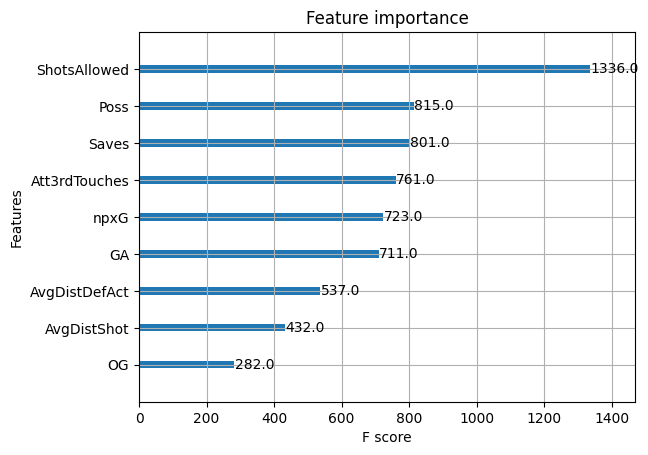

<Figure size 640x480 with 0 Axes>

In [366]:
plot_importance(model)
pyplot.show()
pyplot.savefig('fscore.png')

In [346]:
data = pd.read_excel('data.xlsx')

In [347]:
data.head()

,Unnamed: 0,Squad,Year,npxG,npxG.1,Country,xGA,xGA/90,xBlocks,Blocks,BOE
0,0,Arsenal,2022-2023,16.3,0.81,eng ENG,18.6,0.930000,2.169703,2.400000,0.230297
1,1,Aston Villa,2022-2023,26.7,1.27,eng ENG,29.1,1.385714,2.750037,3.190476,0.440439
2,2,Bournemouth,2022-2023,30.6,1.46,eng ENG,35.3,1.680952,4.093349,4.666667,0.573317
3,3,Brentford,2022-2023,25.7,1.22,eng ENG,26.3,1.252381,4.240832,4.857143,0.616311
4,4,Brighton,2022-2023,20.2,1.01,eng ENG,25.1,1.255000,2.535681,2.600000,0.064319


In [348]:
boe_avg = data['BOE'].mean()

In [349]:
xg_avg = data['npxGA'].mean()

In [353]:
d = {}
data["Segmentation"] = d

C:\Users\jrajenav\AppData\Local\Temp\ipykernel_5464\2374140795.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data["Segmentation"] = d


In [357]:
data = data.rename(columns={"npxG.1":"npxGA"})

In [362]:
for i, j in data.iterrows():
    ifor_val = 0
    if j.BOE >= boe_avg and j.npxGA <= xg_avg:
        ifor_val = 1
    elif j.BOE >= boe_avg and j.npxGA >= xg_avg:
        ifor_val = 2
    elif j.BOE <= boe_avg and j.npxGA <= xg_avg:
        ifor_val = 3
    else:
        ifor_val = 4
    data.at[i,'Segmentation'] = ifor_val

In [ ]:
for i, row in df.iterrows():
    ifor_val = something
    if <condition>:
        ifor_val = something_else
    df.at[i,'ifor'] = ifor_val

In [363]:
data

,Unnamed: 0,Squad,Year,npxG,npxGA,Country,xGA,xGA/90,xBlocks,Blocks,BOE,Segmentation
0,0,Arsenal,2022-2023,16.3,0.81,eng ENG,18.6,0.930000,2.169703,2.400000,0.230297,1.0
1,1,Aston Villa,2022-2023,26.7,1.27,eng ENG,29.1,1.385714,2.750037,3.190476,0.440439,2.0
2,2,Bournemouth,2022-2023,30.6,1.46,eng ENG,35.3,1.680952,4.093349,4.666667,0.573317,2.0
3,3,Brentford,2022-2023,25.7,1.22,eng ENG,26.3,1.252381,4.240832,4.857143,0.616311,2.0
4,4,Brighton,2022-2023,20.2,1.01,eng ENG,25.1,1.255000,2.535681,2.600000,0.064319,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,Sampdoria,2022-2023,26.0,1.30,it ITA,30.5,1.525000,2.970731,3.000000,0.029269,4.0
94,94,Sassuolo,2022-2023,25.2,1.20,it ITA,27.8,1.323810,2.795532,2.666667,-0.128865,3.0
95,95,Spezia,2022-2023,32.3,1.54,it ITA,33.9,1.614286,4.125963,4.857143,0.731180,2.0
96,96,Torino,2022-2023,21.7,1.03,it ITA,24.8,1.180952,2.877465,3.095238,0.217774,1.0


In [365]:
data.to_excel('data_new.xlsx')